In [53]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [54]:
import numpy as np
import pandas as pd

In [79]:
from datetime import datetime
import datetime as dt 

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [81]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [82]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [83]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [86]:
data = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2017-06-03').all())


In [87]:
data.head()

,date,prcp
0,2017-06-04,0.0
1,2017-06-05,0.0
2,2017-06-06,0.0
3,2017-06-07,0.0
4,2017-06-08,0.0


In [88]:
data.set_index('date', inplace=True)
data.head()

,prcp
date,
2017-06-04,0.0
2017-06-05,0.0
2017-06-06,0.0
2017-06-07,0.0
2017-06-08,0.0


<IPython.core.display.Javascript object>


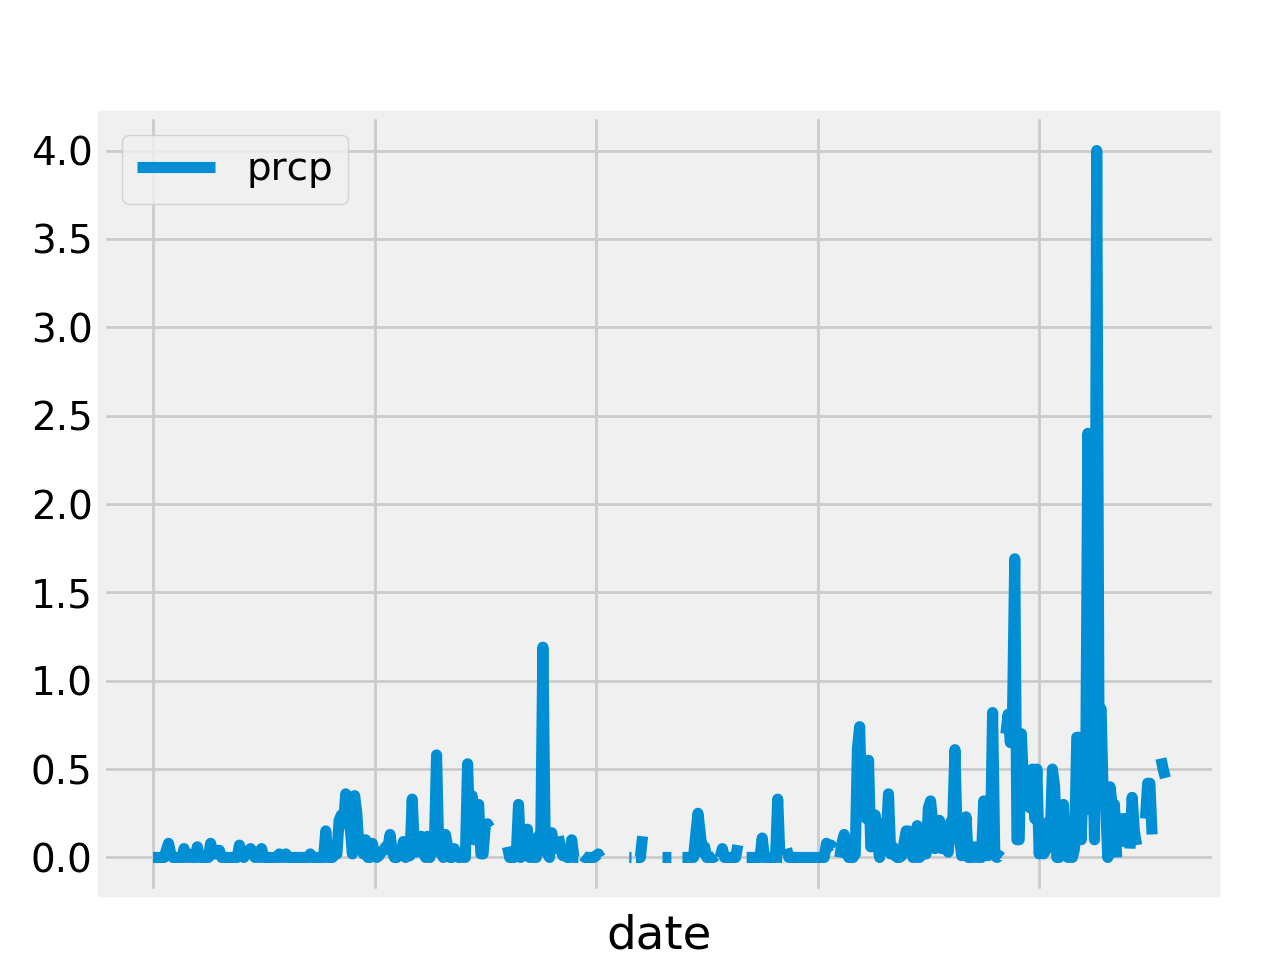

In [89]:
data.plot()

In [47]:
# statistics
data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [105]:
todaydate = datetime.now()
oneyearback = todaydate.replace(year=todaydate.year-1).strftime("%Y-%m-%d")
oneyearback

'2017-08-28'

In [106]:
# Sort the dataframe by date
#data = data.sort_values(by='date', ascending=True)
data.head()



,prcp
date,
2017-06-04,0.0
2017-06-05,0.0
2017-06-06,0.0
2017-06-07,0.0
2017-06-08,0.0


In [107]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#fin
# Calculate the date 1 year ago from today
#fin
# Perform a query to retrieve the data and precipitation scores
#fin
# Save the query results as a Pandas DataFrame and set the index to the date column
#fin
# Sort the dataframe by date
#fin
# Use Pandas Plotting with Matplotlib to plot the data
#
# Rotate the xticks for the dates


In [108]:
# How many stations are available in this dataset?
len(session.query(Station.station).all())

9

In [109]:
# What are the most active stations?
dataM = pd.read_sql("SELECT Measurement.station, COUNT(Measurement.station) FROM Measurement GROUP BY Measurement.station ORDER BY COUNT(Measurement.station)DESC",conn)
dataM

# List the stations and the counts in descending order.


,station,COUNT(Measurement.station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [110]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

In [111]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_hist_data = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-23').all())
temp_hist_data.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


<IPython.core.display.Javascript object>


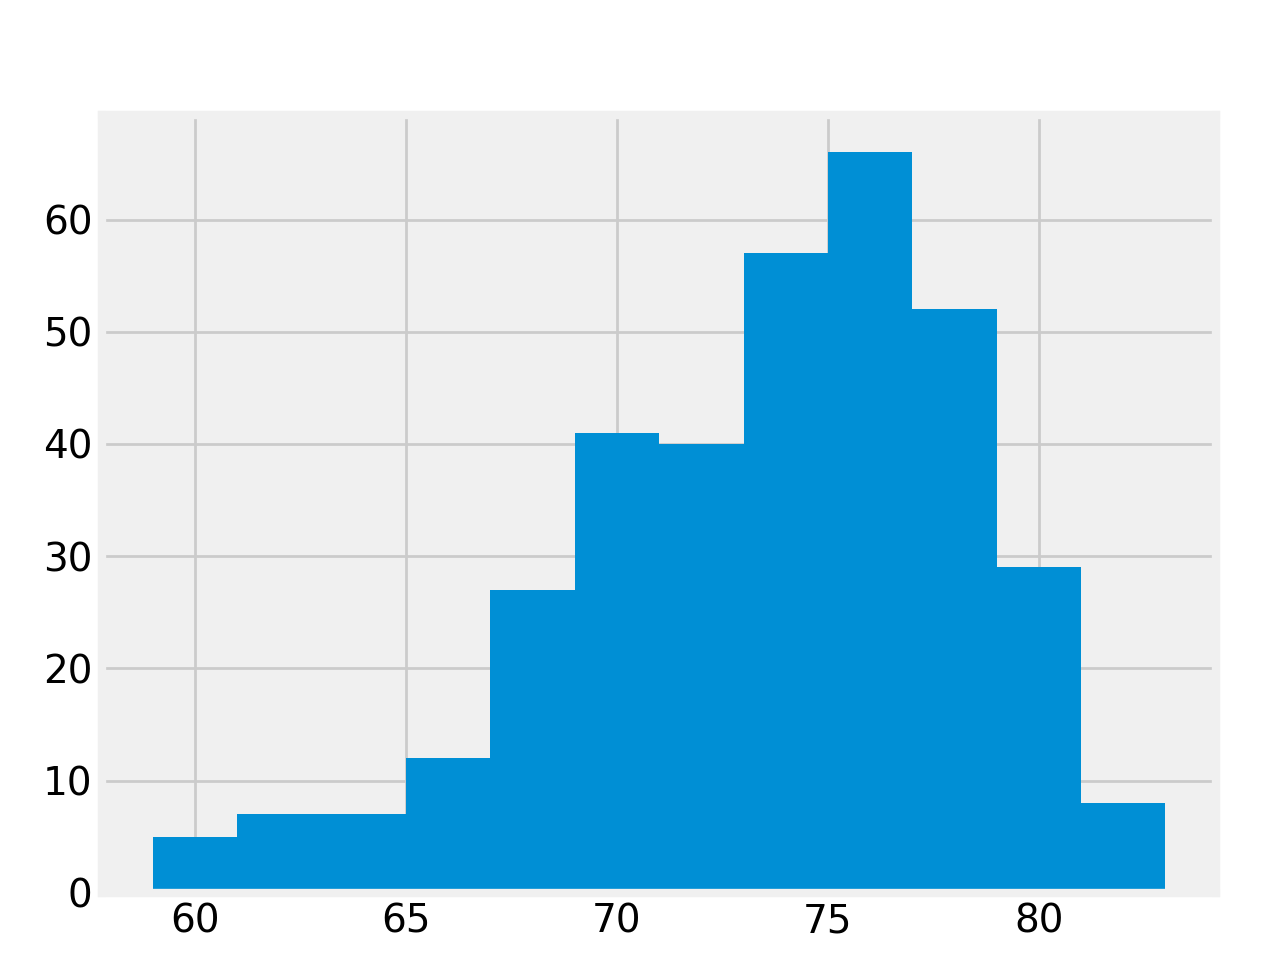

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

In [112]:
plt.figure()
plt.hist(temp_hist_data['tobs'], bins=12)


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


# step #2

In [116]:
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
from datetime import datetime
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Save reference to the table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)
#################################################
# Flask Setup
#################################################
app = Flask(__name__)
#################################################
# Flask Routes
#################################################
todaydate = datetime.now()
oneyearback = todaydate.replace(year=todaydate.year-1).strftime("%Y-%m-%d")
oneyearback = "2017-06-03"
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/tobs<br/>"
        f"//api/v1.0/<start> and /api/v1.0/<start>/<end><br/>"
        f"/api/v1.0/stations"
    )
@app.route("/api/v1.0/precipitation")
def names():
    df2 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= oneyearback).all()
    lst = {}
    for x in df2:
        #print(x[0])
        lst[x[0]] = x[1]
    print(lst)
    return jsonify(lst)
@app.route("/api/v1.0/stations")
def stations():
    df2 = session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()
    lst = {}
    for x in df2:
        #print(x[0])
        #lst[x[1]] = [x[2],x[3],x[4],x[5]]
        lst[x[1]] = {"name":x[2],"latitude":x[3],"longitude":x[4],"elevation":x[5]}
    #print(lst)
    return jsonify(lst)
@app.route("/api/v1.0/tobs")
def tobs():
    df2 = session.query(Measurement.tobs).filter(Measurement.date >= oneyearback).all()
    lst = []
    for x in df2:
        lst.append(x[0])
    return jsonify(lst)
@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def justice_league_character2(start,end=False):
    """Return a list of passenger data including the name, age, and sex of each passenger"""
    # Query all passengers
    sql = "SELECT MAX(`tobs`), MIN(`tobs`), AVG(`tobs`), `date` FROM `measurement` WHERE"
    if end == False:
        sql += " `date`='"+str(start)+"'"
    else:
        sql += " `date` > '"+str(start)+"' AND `date` < '"+str(end)+"'"
    sql += " GROUP BY `date`"
    df2 = engine.execute(sql).fetchall()
    print(sql)
    lst = []
    for x in df2:
        l = {
            "date":x[3],
            "max":x[0],
            "min":x[1],
            "avg":x[2]
        }
        lst.append(l)
    #print(lst)
    return jsonify(lst)
if __name__ == '__main__':
    app.run(debug=True)



 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/streetcodeacademy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
